In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("IPL sample data.csv")
df = df.dropna(axis=1, how='all').copy()   # drop empty columns
print("✅ Data Loaded")
print("Columns:", df.columns.tolist())
df.head()

✅ Data Loaded
Columns: ['Pick', 'Y->', 'Clean Pick', 'N->', 'Fumble', 'C->', 'Catch', 'DC->', 'Dropped Catch', 'S->', 'Stumping', 'Unnamed: 11', 'Unnamed: 12']


,Pick,Y->,Clean Pick,N->,Fumble,C->,Catch,DC->,Dropped Catch,S->,Stumping,Unnamed: 11,Unnamed: 12
0,Throw,Y->,Good Throw,N->,Bad throw,DH->,Dirct Hit,RO->,Run Out,MR->,Missed Runout,NaN,NaN
1,Runs,"""+"" stands for runs saved ""-"" stands for runs ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Match No.,Innings,Teams,Player Name,BallCount,Position,Pick,Throw,Runs,Overcount,Venue,Stadium
4,NaN,IPL2367,1,Delhi Capitals,Rilee russouw,0.1,Short mid wicket,n,NaN,1,1,Delhi,Arun Jaitly Stadium


In [4]:
df.rename(columns={
    'Y->': 'Yes_Action',
    'N->': 'No_Action',
    'C->': 'Catch',
    'DC->': 'Dropped_Catch',
    'S->': 'Stumping'
}, inplace=True)

In [5]:
replace_map = {
    'Y->': 1, 'N->': 0,
    'C->': 1, 'DC->': 1, 'S->': 1,
    'Clean Pick': 1, 'Fumble': 1,
    'Catch': 1, 'Dropped Catch': 1, 'Stumping': 1
}
df = df.replace(replace_map)


In [7]:
for col in df.columns:
    try:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    except Exception:
        continue

In [8]:
counts = df.sum(numeric_only=True)
print("\nFielding Action Counts:\n", counts)


Fielding Action Counts:
 Pick              0.0
Yes_Action        1.0
Clean Pick       28.0
No_Action        10.0
Fumble            6.0
Dropped_Catch     2.0
Dropped Catch     1.0
Unnamed: 11      58.0
Unnamed: 12       0.0
dtype: float64


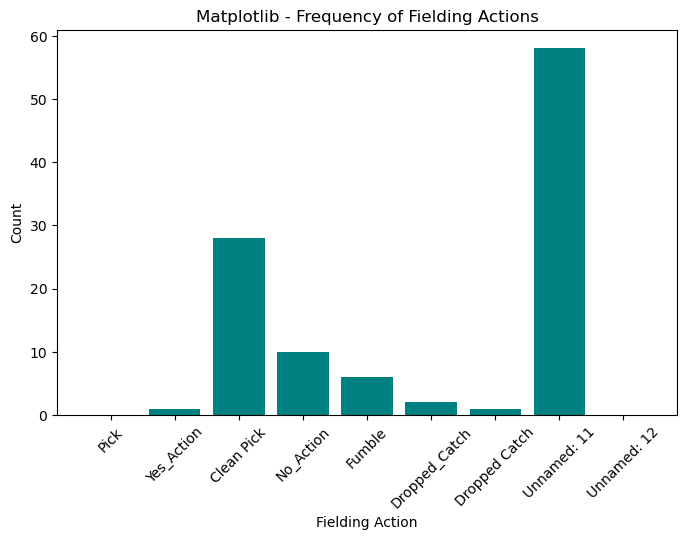

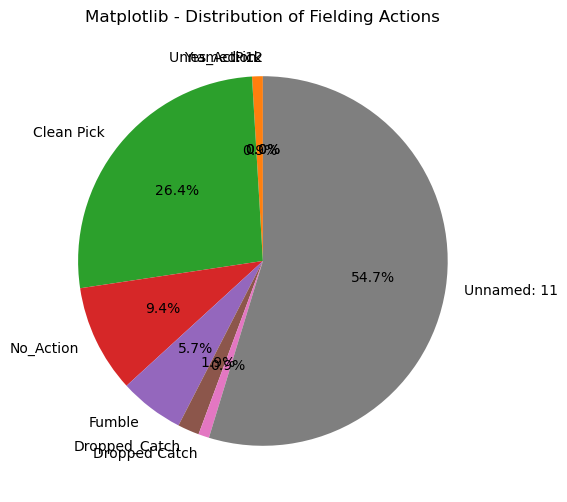

In [9]:
plt.figure(figsize=(8,5))
plt.bar(counts.index, counts.values, color='teal')
plt.title("Matplotlib - Frequency of Fielding Actions")
plt.xlabel("Fielding Action")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(6,6))
plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Matplotlib - Distribution of Fielding Actions")
plt.show()

C:\Users\REA\AppData\Local\Temp\ipykernel_26324\3705166060.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='coolwarm')


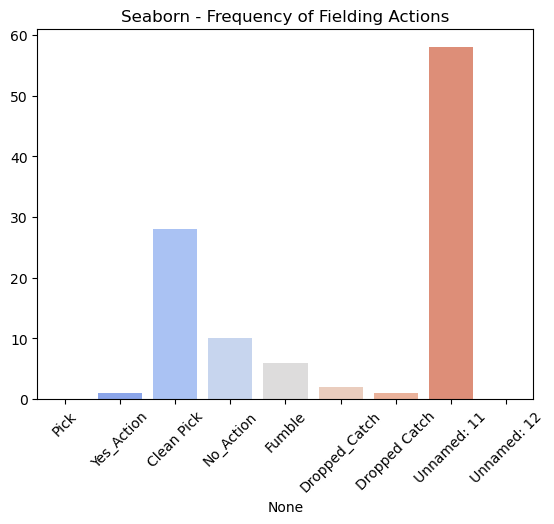

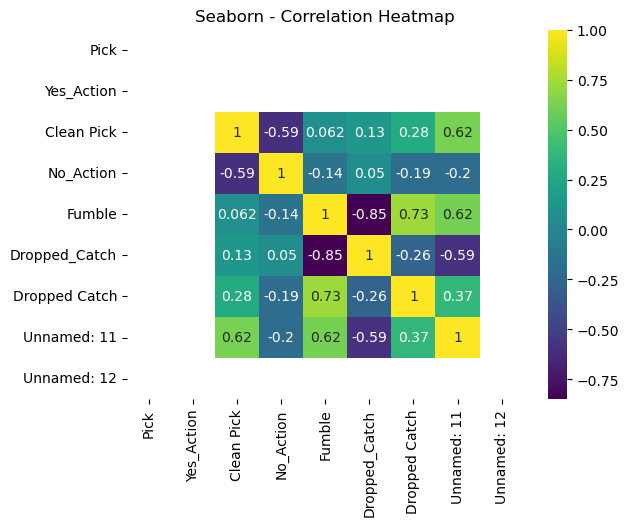


✅ Task 1 Visualizations Completed Successfully!


In [10]:
sns.barplot(x=counts.index, y=counts.values, palette='coolwarm')
plt.title("Seaborn - Frequency of Fielding Actions")
plt.xticks(rotation=45)
plt.show()

sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='viridis')
plt.title("Seaborn - Correlation Heatmap")
plt.show()

print("\n✅ Task 1 Visualizations Completed Successfully!")